<a href="https://colab.research.google.com/github/V6388/Visualization-and-Analysis-Kaggle-Survey-2020-/blob/main/Visualization_and_Analysis_Kaggle_Survey_2020_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
kaggle_data=pd.read_csv('kaggle_survey_2020_responses.csv')

In [6]:
kaggle_data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [7]:
kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 4.4+ MB


In [8]:
kaggle_data.shape

(1610, 355)

In [9]:
kaggle_data.isnull()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,False,False,True,True,False,True,False,True,True,True,True,True,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False,True,True,True,False,False,True,True,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,False,True,True,False,True,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,False,True,True,True,False,True,True,True,False,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
4,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,False,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1606,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,False,True,True,False,False,True,True,True,True,Fals

In [10]:
kaggle_data.isnull().sum()

Time from Start to Finish (seconds)       0
Q1                                        0
Q2                                        0
Q3                                        0
Q4                                       33
                                       ... 
Q35_B_Part_7                           1582
Q35_B_Part_8                           1552
Q35_B_Part_9                           1569
Q35_B_Part_10                          1373
Q35_B_OTHER                            1576
Length: 355, dtype: int64

In [11]:
kaggle_data.Q1

0       What is your age (# years)?
1                             35-39
2                             30-34
3                             35-39
4                             30-34
                   ...             
1605                          40-44
1606                          55-59
1607                          22-24
1608                          40-44
1609                          40-44
Name: Q1, Length: 1610, dtype: object

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200

In [20]:
questions = kaggle_data.iloc[0, :].T
kaggle = kaggle_data.iloc[1:, :]

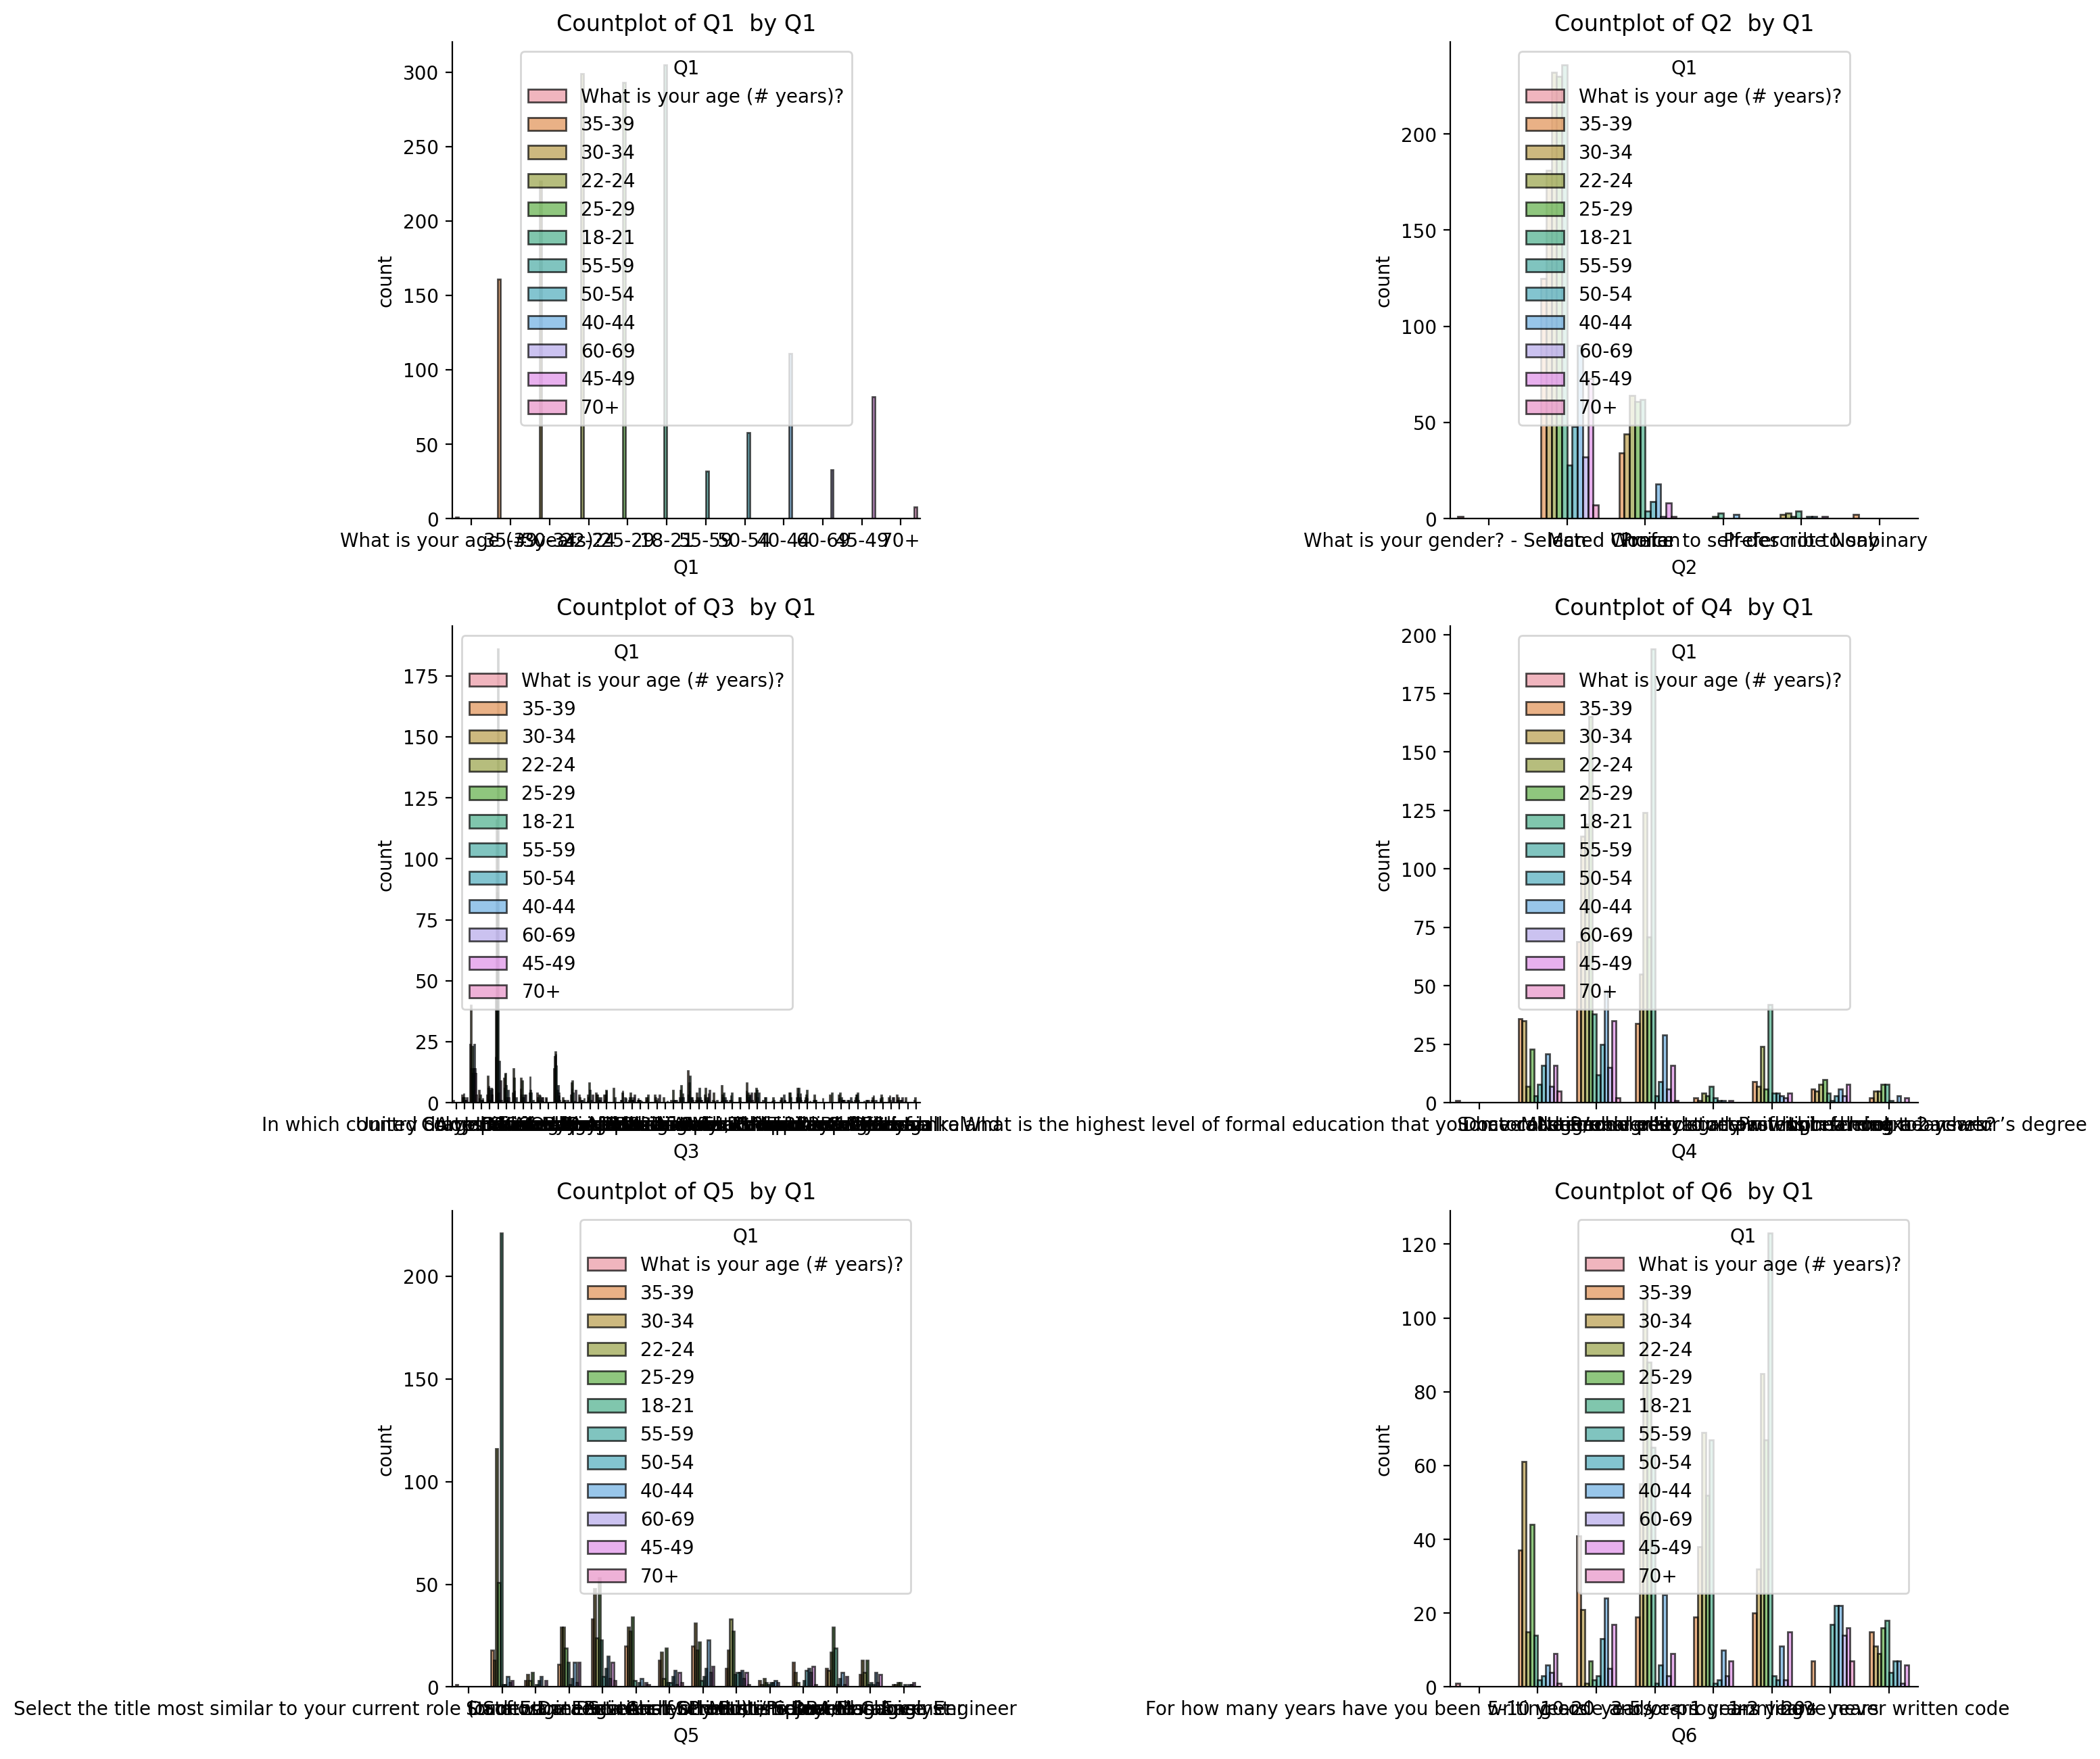

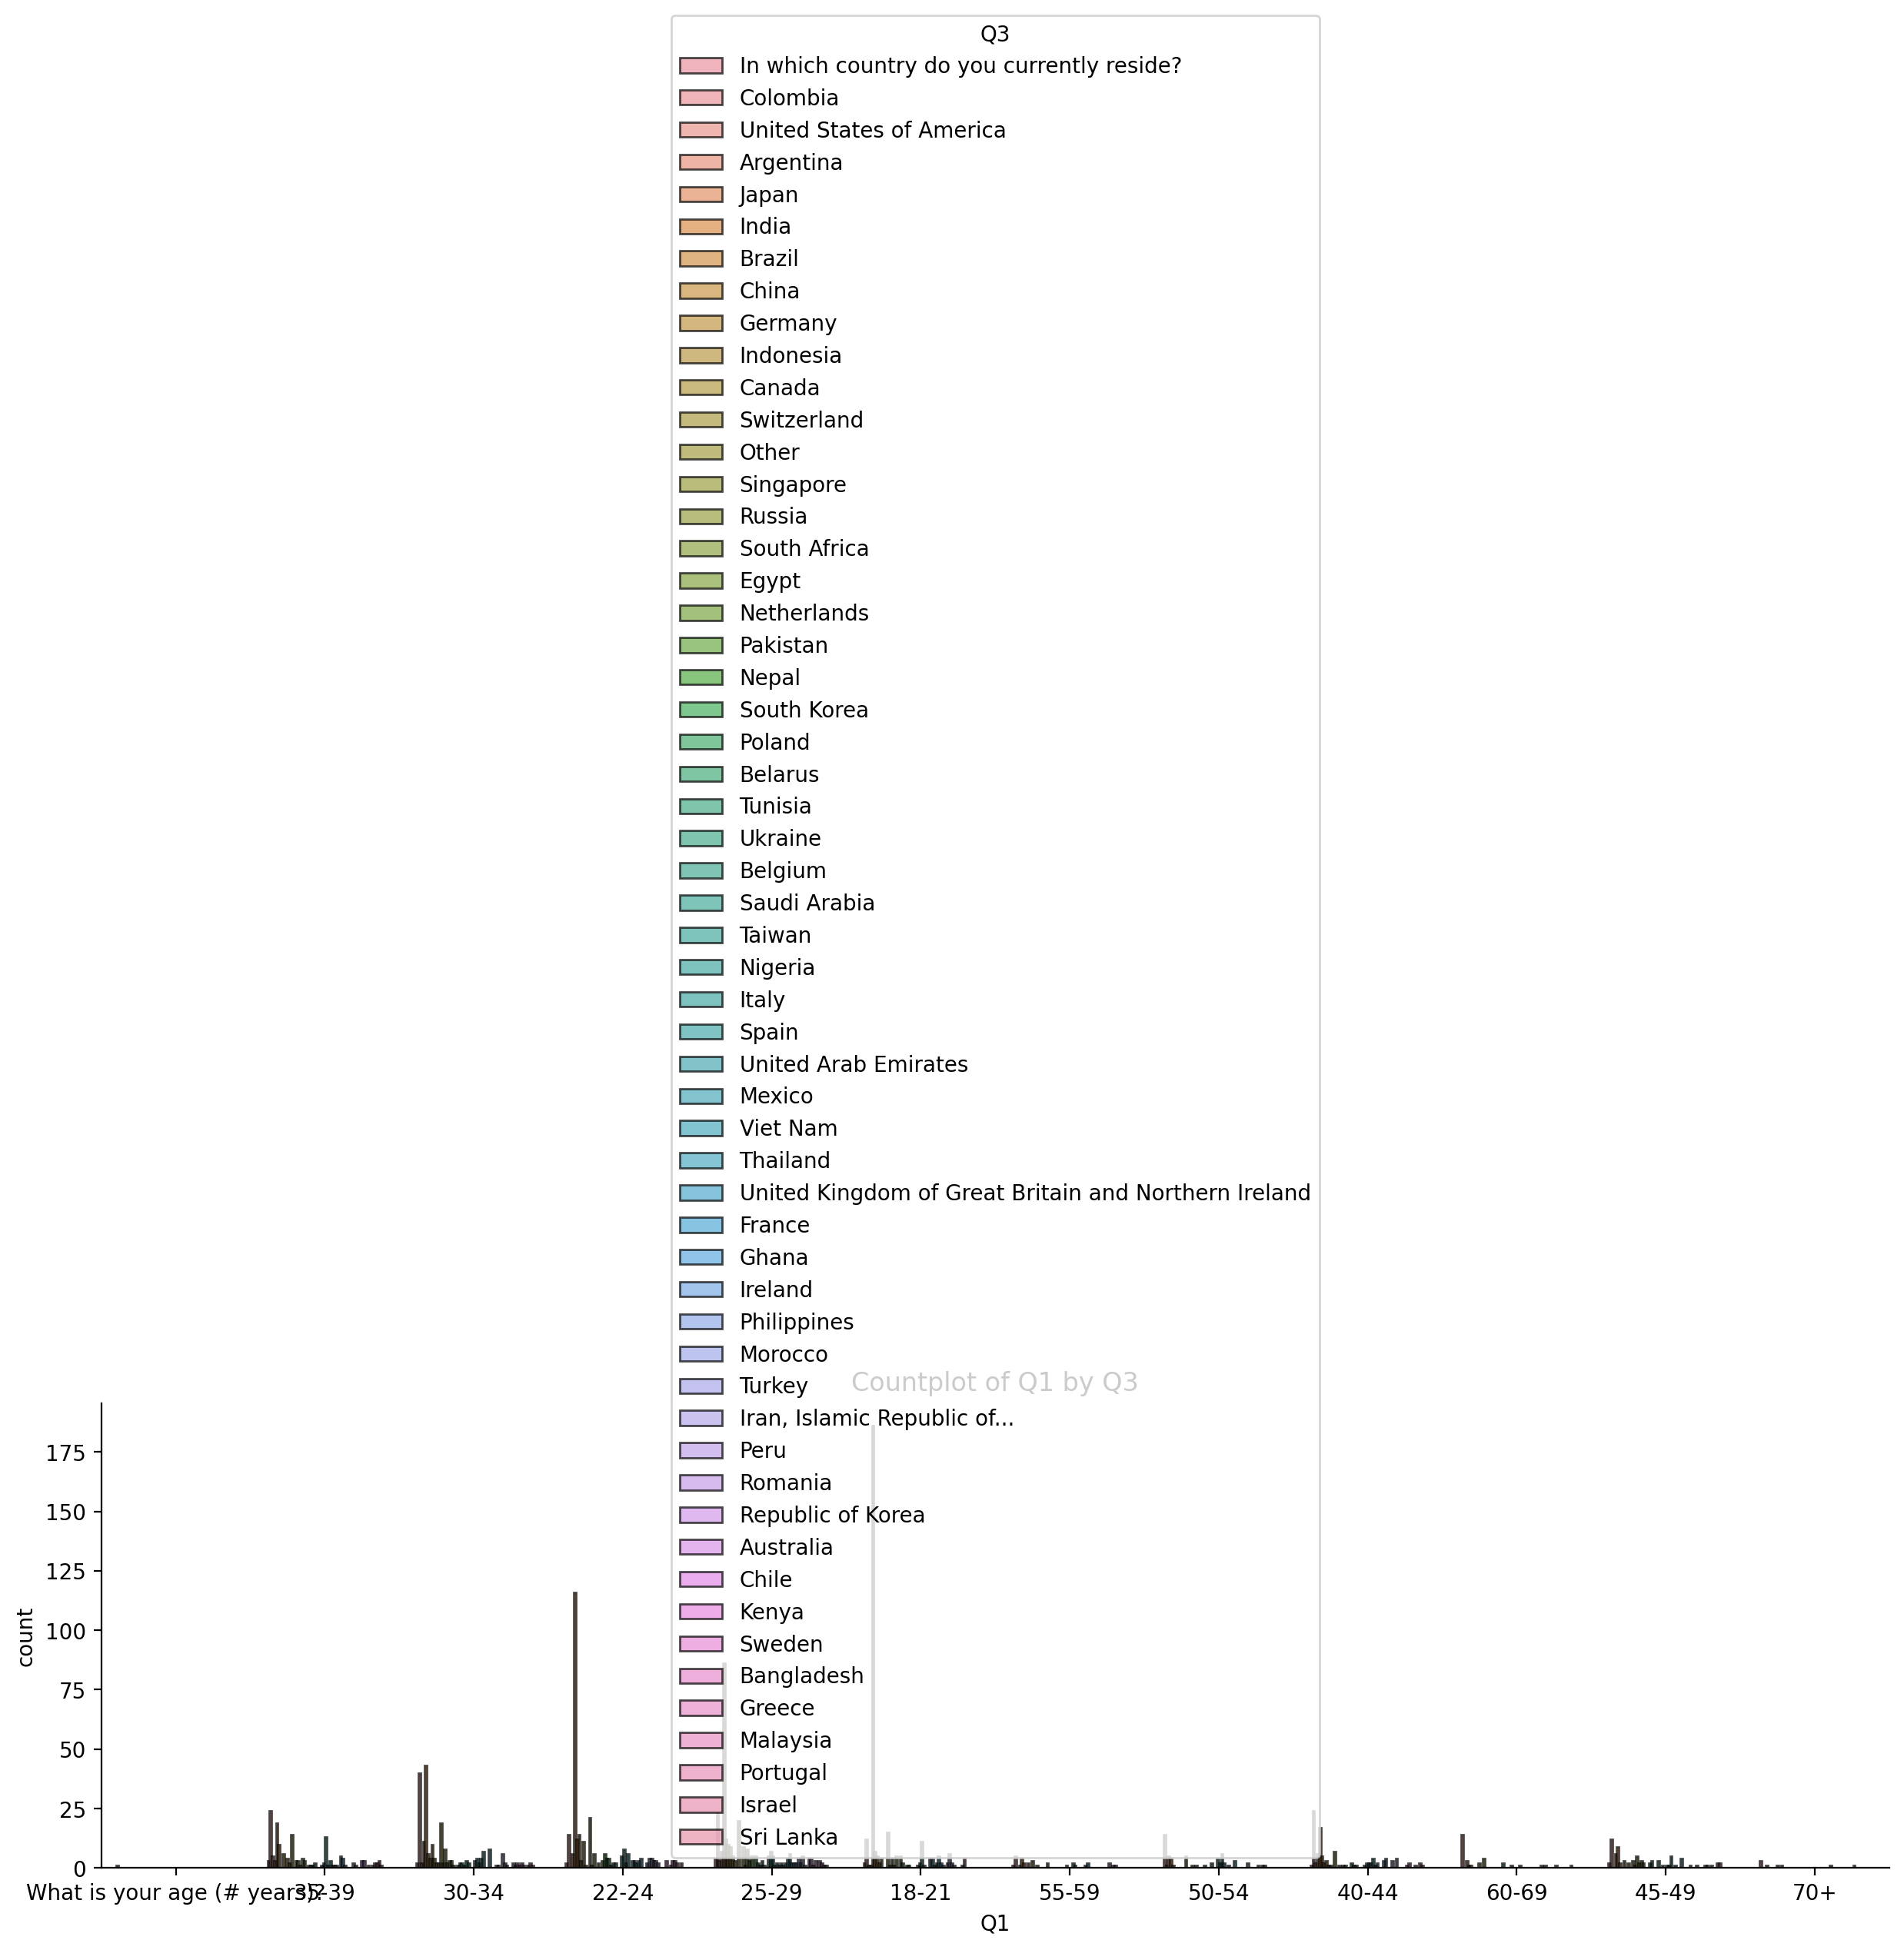

In [21]:
# showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=['Q1','Q2','Q3','Q4','Q5','Q6']
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='Q1', edgecolor="black", alpha=0.7, data=kaggle_data)
    sns.despine()
    plt.title("Countplot of {}  by Q1".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[15,4])
sns.countplot(x='Q1', hue='Q3',edgecolor="black", alpha=0.7, data=kaggle_data)
sns.despine()
plt.title("Countplot of Q1 by Q3")
plt.show()

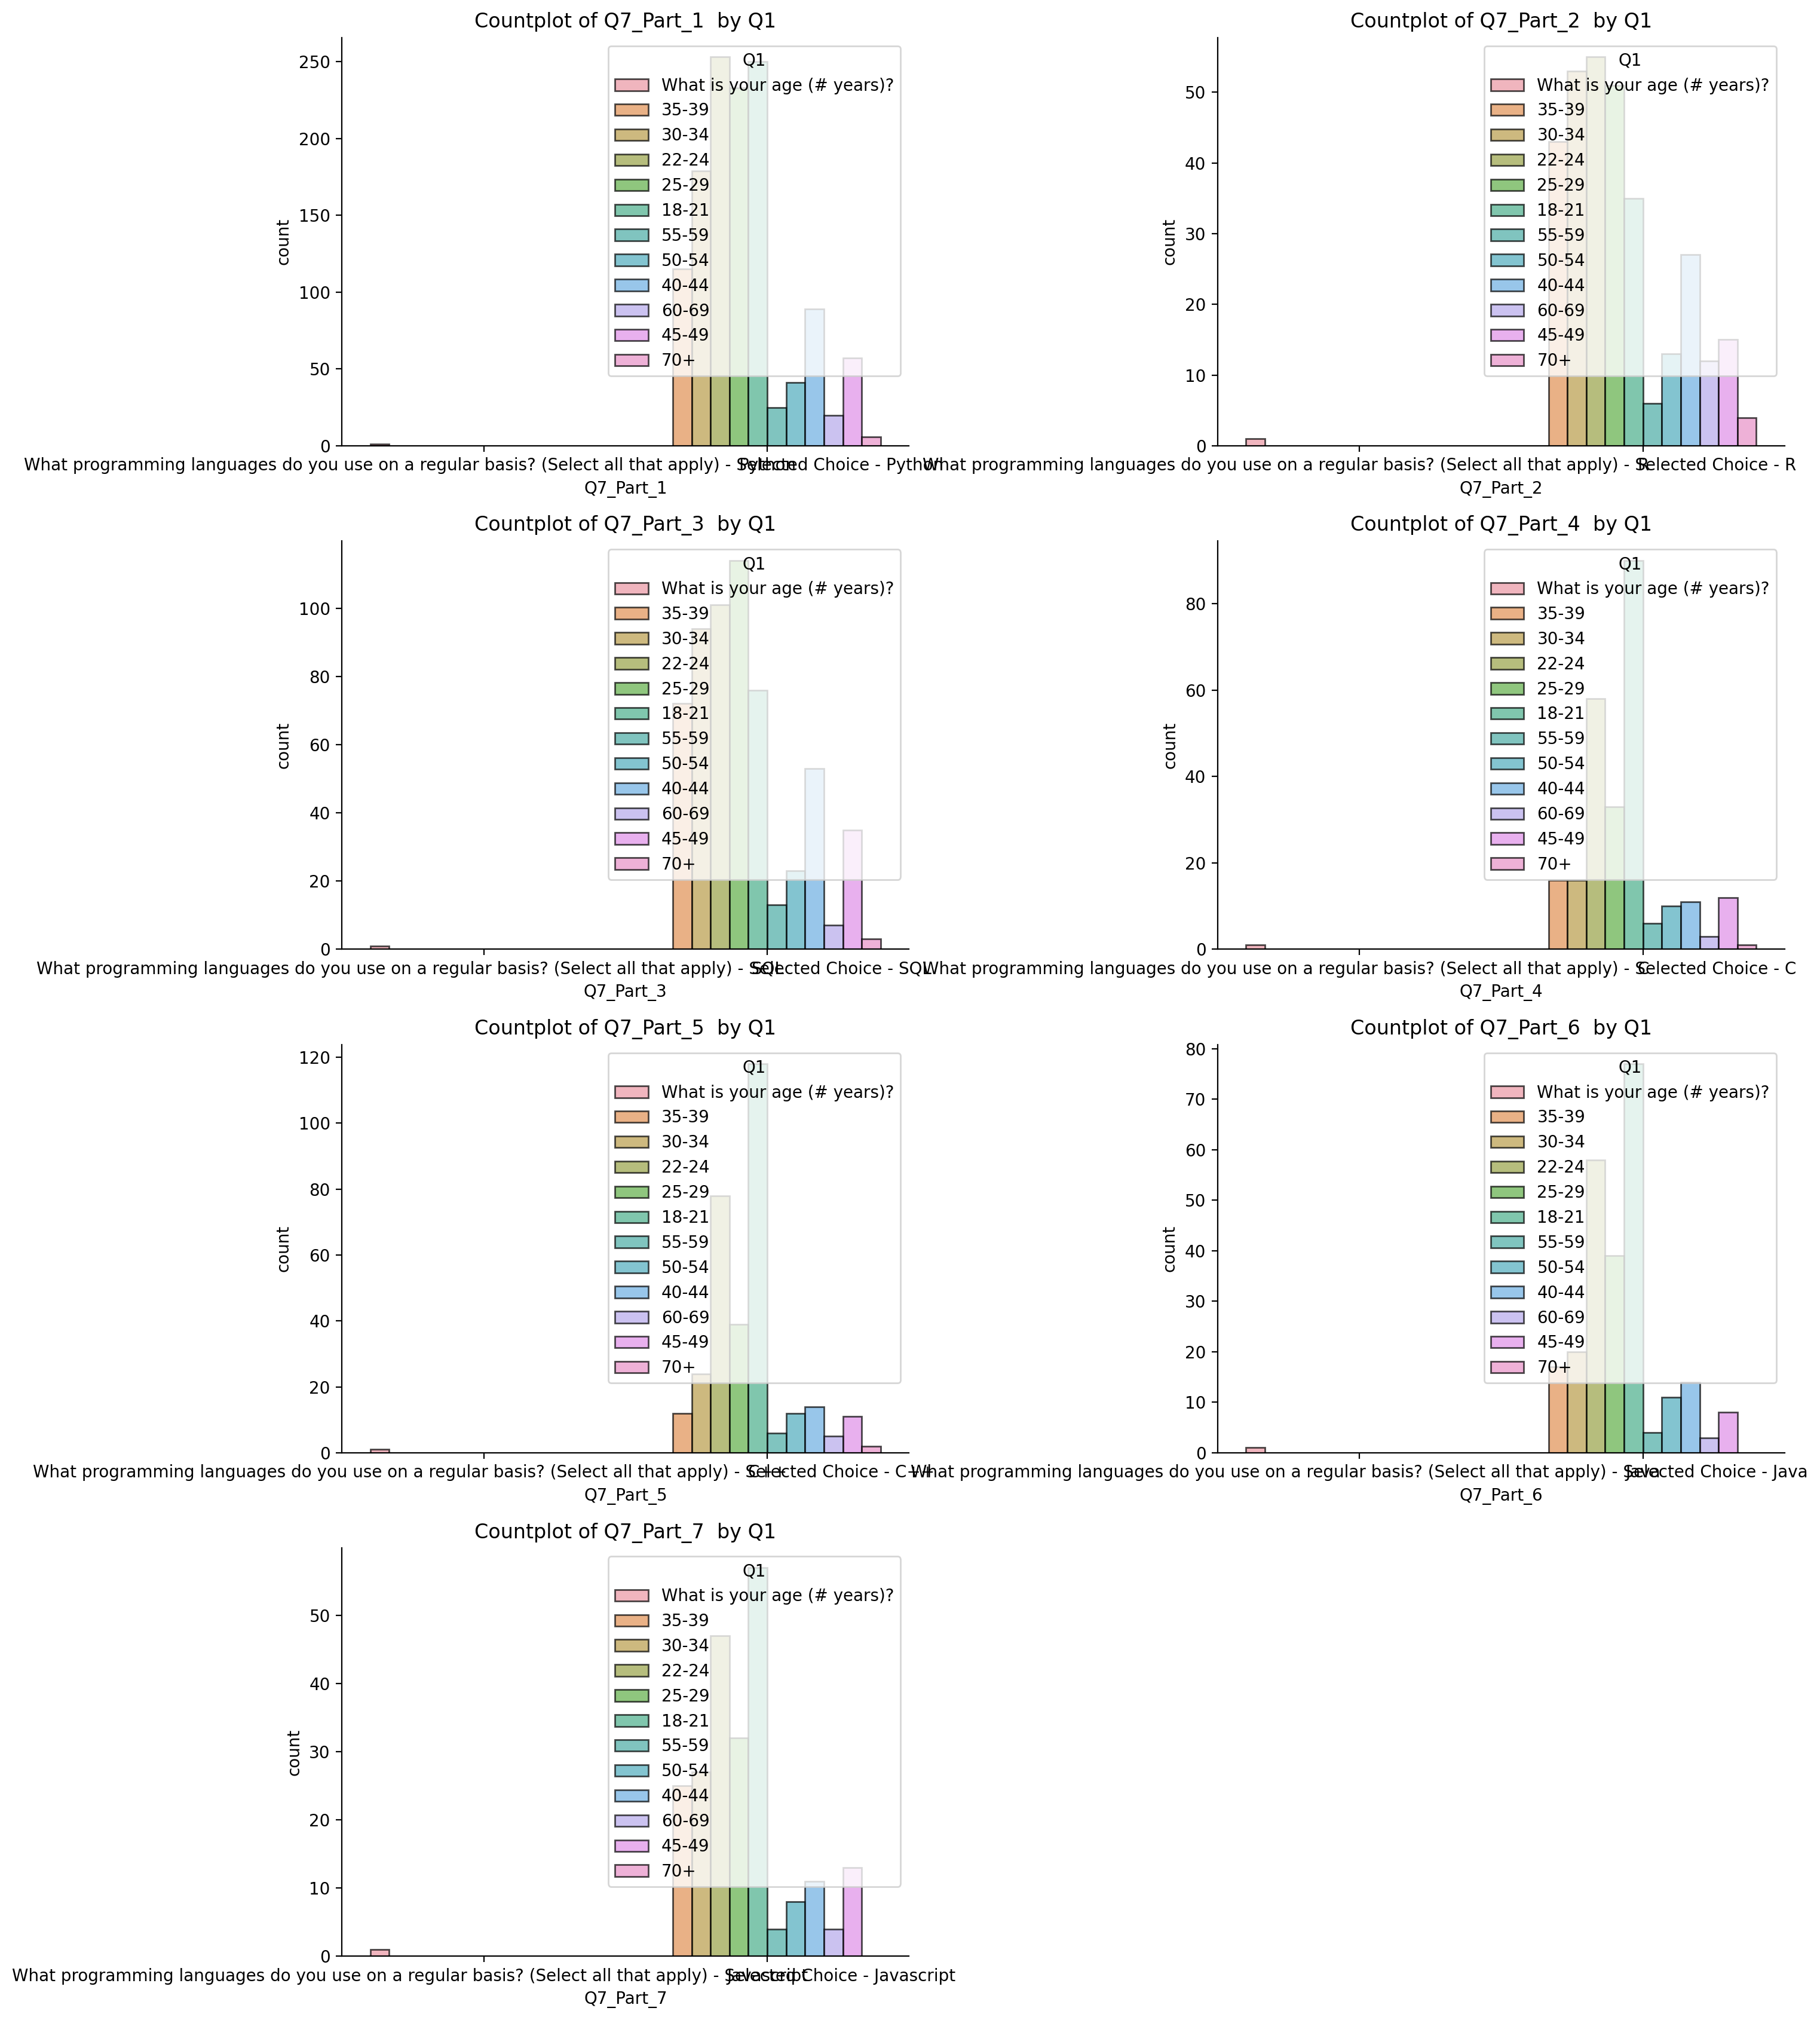

In [23]:
plt.figure(figsize=[15,17])
fft=['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7']
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='Q1', edgecolor="black", alpha=0.7, data=kaggle_data)
    sns.despine()
    plt.title("Countplot of {}  by Q1".format(f))
    n=n+1
plt.tight_layout()
plt.show()

See Kaggle_data by gender


In [34]:
def kaggler_2020(x):
    y = kaggle_data[["Q2","Q3","Q4","Q5"]][kaggle_data["Q2"] == x]
    y = y.sort_values(by="Q3",ascending=False)
    return y.head(500)

In [25]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q2'].value_counts().reset_index()
kg.columns = [
    'Q2', 
    'percent'
]
kg['percent'] /= len(kaggle_data)

fig = px.pie(
    kg, 
    names='Q2', 
    values='percent', 
    title='See Kaggler by gender', 
    width=800,
    height=500 
)

fig.show()

In [26]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q2'].value_counts().reset_index()
kg.columns = [
    'Q2', 
    'count'
]
kg['Q2'] = kg['Q2'].astype(str) + '-'
kg = kg.sort_values(['count']).tail(50)

fig = px.bar(
    kg, 
    x='count', 
    y='Q2', 
    orientation='h', 
    title='See Kaggler by gender', 
    width=1000,
    height=900 
)

fig.show()

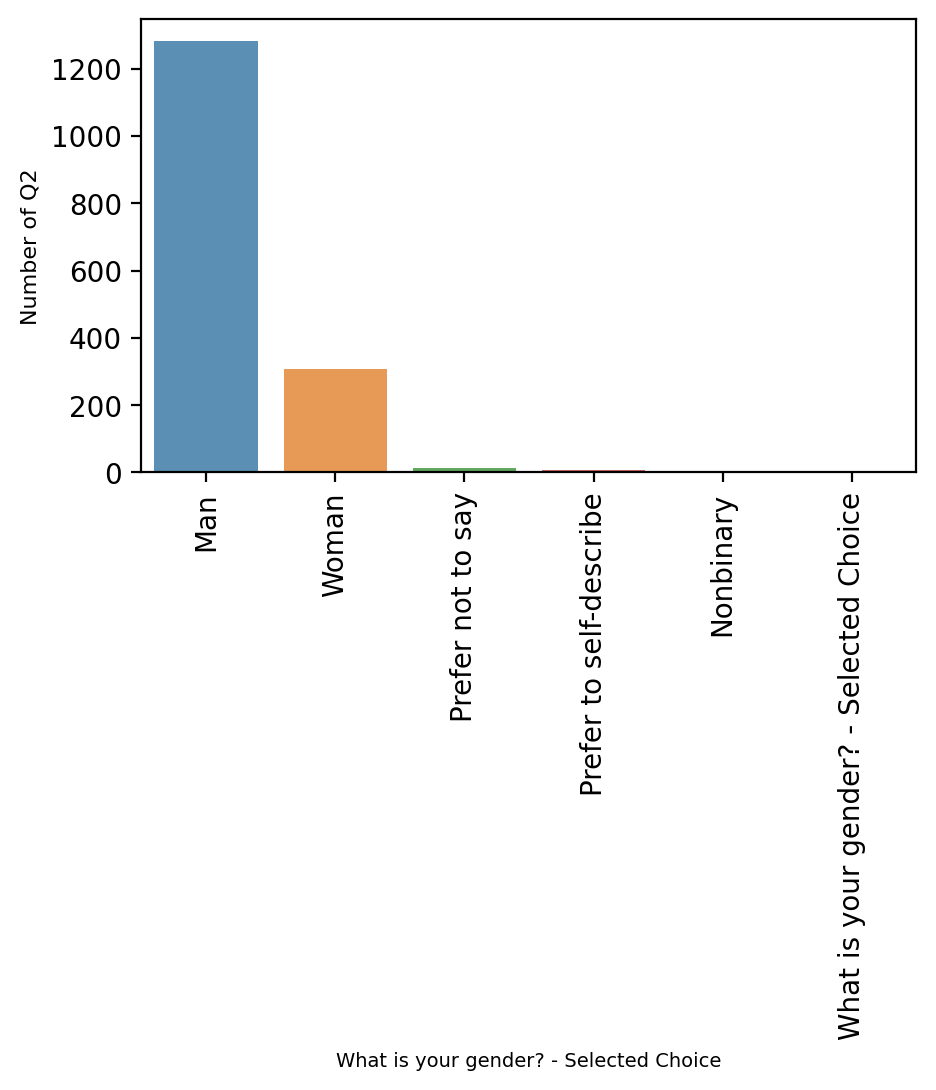

In [27]:
kaggler_q2 = kaggle_data['Q2'].value_counts()  
plt.figure(figsize=(5,3))
sns.barplot(kaggler_q2.index, kaggler_q2.values, alpha=0.8)
plt.ylabel('Number of Q2', fontsize=8)
plt.xlabel('What is your gender? - Selected Choice', fontsize=7)
plt.xticks(rotation=90)
plt.show();

#Man


In [35]:
kaggler_2020("Man")

,Q2,Q3,Q4,Q5
117,Man,Viet Nam,Bachelor’s degree,Student
1136,Man,Viet Nam,Bachelor’s degree,Student
1178,Man,Viet Nam,Master’s degree,Machine Learning Engineer
533,Man,Viet Nam,Bachelor’s degree,Currently not employed
1596,Man,Viet Nam,Bachelor’s degree,Data Analyst
...,...,...,...,...
1084,Man,Nigeria,Master’s degree,Data Analyst
1071,Man,Nigeria,Master’s degree,Software Engineer
719,Man,Nigeria,Bachelor’s degree,Currently not employed
1037,Man,Nigeria,Bachelor’s degree,Data Engineer


In [36]:
kaggler_2020("Woman")

,Q2,Q3,Q4,Q5
1597,Woman,United States of America,Master’s degree,Research Scientist
124,Woman,United States of America,Doctoral degree,Data Scientist
1375,Woman,United States of America,Doctoral degree,Other
1295,Woman,United States of America,Master’s degree,Machine Learning Engineer
188,Woman,United States of America,Bachelor’s degree,Data Analyst
...,...,...,...,...
816,Woman,Australia,Master’s degree,Currently not employed
1557,Woman,Argentina,Master’s degree,Student
693,Woman,Argentina,Bachelor’s degree,Data Scientist
802,Woman,Argentina,Master’s degree,Business Analyst


#See kaggle_data by age

In [37]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q1'].value_counts().reset_index()
kg.columns = [
    'Q1', 
    'percent'
]
kg['percent'] /= len(kaggle_data)

fig = px.pie(
    kg, 
    names='Q1', 
    values='percent', 
    title='See Kaggler by age', 
    width=800,
    height=500 
)

fig.show()

In [38]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q1'].value_counts().reset_index()
kg.columns = [
    'Q1', 
    'count'
]
kg['Q1'] = kg['Q1'].astype(str) + '-'
kg = kg.sort_values(['count']).tail(50)

fig = px.bar(
    kg, 
    x='count', 
    y='Q1', 
    orientation='h', 
    title='What is your age (# years)?', 
    width=1000,
    height=900 
)

fig.show()

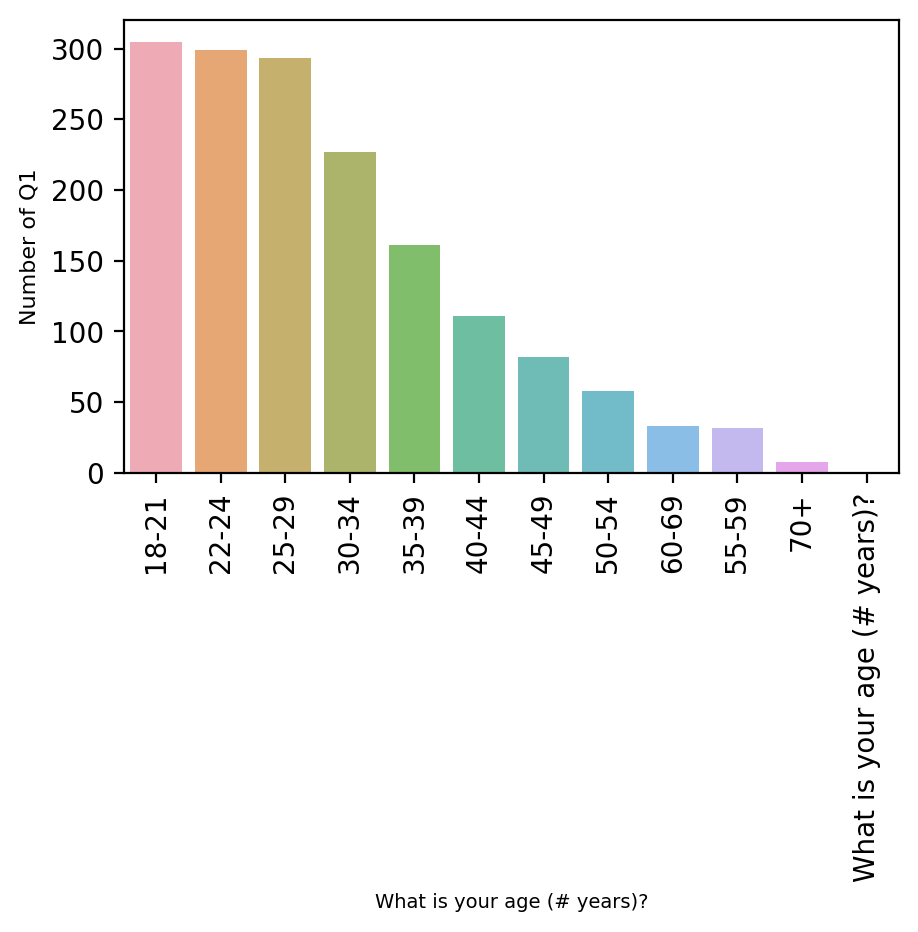

In [39]:
kaggler_q1 = kaggle_data['Q1'].value_counts()  
plt.figure(figsize=(5,3))
sns.barplot(kaggler_q1.index, kaggler_q1.values, alpha=0.8)
plt.ylabel('Number of Q1', fontsize=8)
plt.xlabel('What is your age (# years)?', fontsize=7)
plt.xticks(rotation=90)
plt.show();

# kaggler by country

In [41]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q3'].value_counts().reset_index()
kg.columns = [
    'Q3', 
    'count'
]
kg['Q3'] = kg['Q3'].astype(str) + '-'
kg = kg.sort_values(['count']).tail(50)

fig = px.bar(
    kg, 
    x='count', 
    y='Q3', 
    orientation='h', 
    title='See Kaggler by country', 
    width=1000,
    height=900 
)

fig.show()

#For how many years have you used machine learning methods?

In [42]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q15'].value_counts().reset_index()
kg.columns = [
    'Q15', 
    'percent'
]
kg['percent'] /= len(kaggle_data)

fig = px.pie(
    kg, 
    names='Q15', 
    values='percent', 
    title='For how many years have you used machine learning methods?', 
    width=1000,
    height=600 
)

fig.show()

In [43]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

kg = kaggle_data['Q15'].value_counts().reset_index()
kg.columns = [
    'Q15', 
    'count'
]
kg['Q15'] = kg['Q15'].astype(str) + '-'
kg = kg.sort_values(['count']).tail(50)

fig = px.bar(
    kg, 
    x='count', 
    y='Q15', 
    orientation='h', 
    title='For how many years have you used machine learning methods?', 
    width=1000,
    height=900 
)

fig.show()